In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [39]:
import matplotlib.pyplot as plt

In [5]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.5

In [8]:
config_path = "yolov2.cfg"
weights_path = "yolov2.weights"
labels = open("coco.names").read().strip().split("\n")
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

In [9]:
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [10]:
path_name = "karavan28.jpg"
image = cv2.imread(path_name)

In [12]:
h, w = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

In [15]:
net.setInput(blob)

In [20]:
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in [net.getUnconnectedOutLayers()]]

In [21]:
layer_outputs = net.forward(ln)

In [29]:
font_scale = 2
thickness = 2
boxes, confidences, class_ids = [], [], []
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > CONFIDENCE:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [31]:
for i in range(len(boxes)):
    x, y = boxes[i][0], boxes[i][1]
    w, h = boxes[i][2], boxes[i][3]
    color = [int(c) for c in colors[class_ids[i]]]
    cv2.rectangle(image, (x, y), (x + w, y + h), color=color, thickness=thickness)
    text = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"
    (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
    text_offset_x = x
    text_offset_y = y - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = image.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=font_scale, color=(0, 0, 0), thickness=thickness)

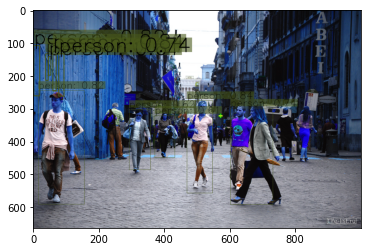

In [41]:
plt.imshow(image, filternorm=F)

In [36]:
image.transpose(2,0,1).shae

(3, 664, 1000)